# Projeto 3 - Clusterização de dados de vendas de produtos
## Wholesale customers Data Set - UCI

## Introdução

O conjunto de dados de vendas esta localizado na plataforma UCI no seguinte link - https://archive.ics.uci.edu/ml/datasets/Wholesale+customers. Este é um conjunto de dados que não possui rotulo, o nosso desafio será agrupar essas vendas em grupos e avaliar estes grupos.

Segue a descrição das variaveis:
- FRESH: gastos anuais em produtos frescos
- MILK: gastos anuais em produtos lácteos
- GROCERY: gastos anuais em produtos de mercearia
- FROZEN: gastos anuais em produtos congelados
- DETERGENTS_PAPER: gastos anuais em detergentes e produtos de papel
- DELICATESSEN: gastos anuais em produtos artesanais (queijos, vinhos, doces)
- CHANNEL: origem do cliente - Horeca (Hotel/Restaurante/Café) (1) ou canais de varejo (2)
- REGION: região do cliente Lisbon (1), Oporto (2) or Other Region (3)

#### referencia: 
Abreu, N. (2011). Analise do perfil do cliente Recheio e desenvolvimento de um sistema promocional. Mestrado em Marketing, ISCTE-IUL, Lisbon

# Sobre este projeto

Neste projeto treine os conhecimentos aprendidos até o momento e que entenda algumas das dificuldades que pode ter quando for aplicar os mesmos. 

Os principais pontos que serão avaliados:

- Levantamento de hipoteses
- Manipulação de dados e criação de gráficos simples com o `Pandas`
- Criar um modelo clusterização e justificar

# Preparação do ambiente

- Acessem o link - https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv e faça o download do conjunto de dados.

In [187]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans

In [188]:
data = pd.read_csv('./Wholesale customers data.csv')

In [189]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [190]:
data.tail()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125
439,1,3,2787,1698,2510,65,477,52


In [191]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [192]:
data.columns = [
            'canal',
            'regiao',
            'frescos',
            'laticinios',
            'mercearia',
            'congelados',
            'limpeza',
            'artesanais'
        ]

In [193]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   canal       440 non-null    int64
 1   regiao      440 non-null    int64
 2   frescos     440 non-null    int64
 3   laticinios  440 non-null    int64
 4   mercearia   440 non-null    int64
 5   congelados  440 non-null    int64
 6   limpeza     440 non-null    int64
 7   artesanais  440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [194]:
data.describe()

,canal,regiao,frescos,laticinios,mercearia,congelados,limpeza,artesanais
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


<AxesSubplot:>

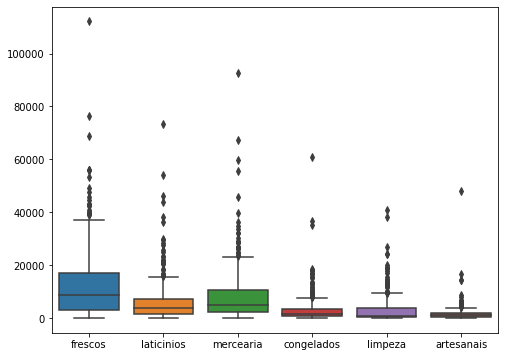

In [195]:
plt.figure(figsize=(8,6))
sns.boxplot(data=data.drop(['canal', 'regiao'], axis=1))

**Salvando o dataframe caso necessário mais à frente**

In [196]:
_data = data

# Exercicio 1. (3.0 pontos)

Faça um gráfico de cotovelo, quantos clusters aproximadamente melhor separam este conjunto de dados informado pelo grafico de cotovelo?

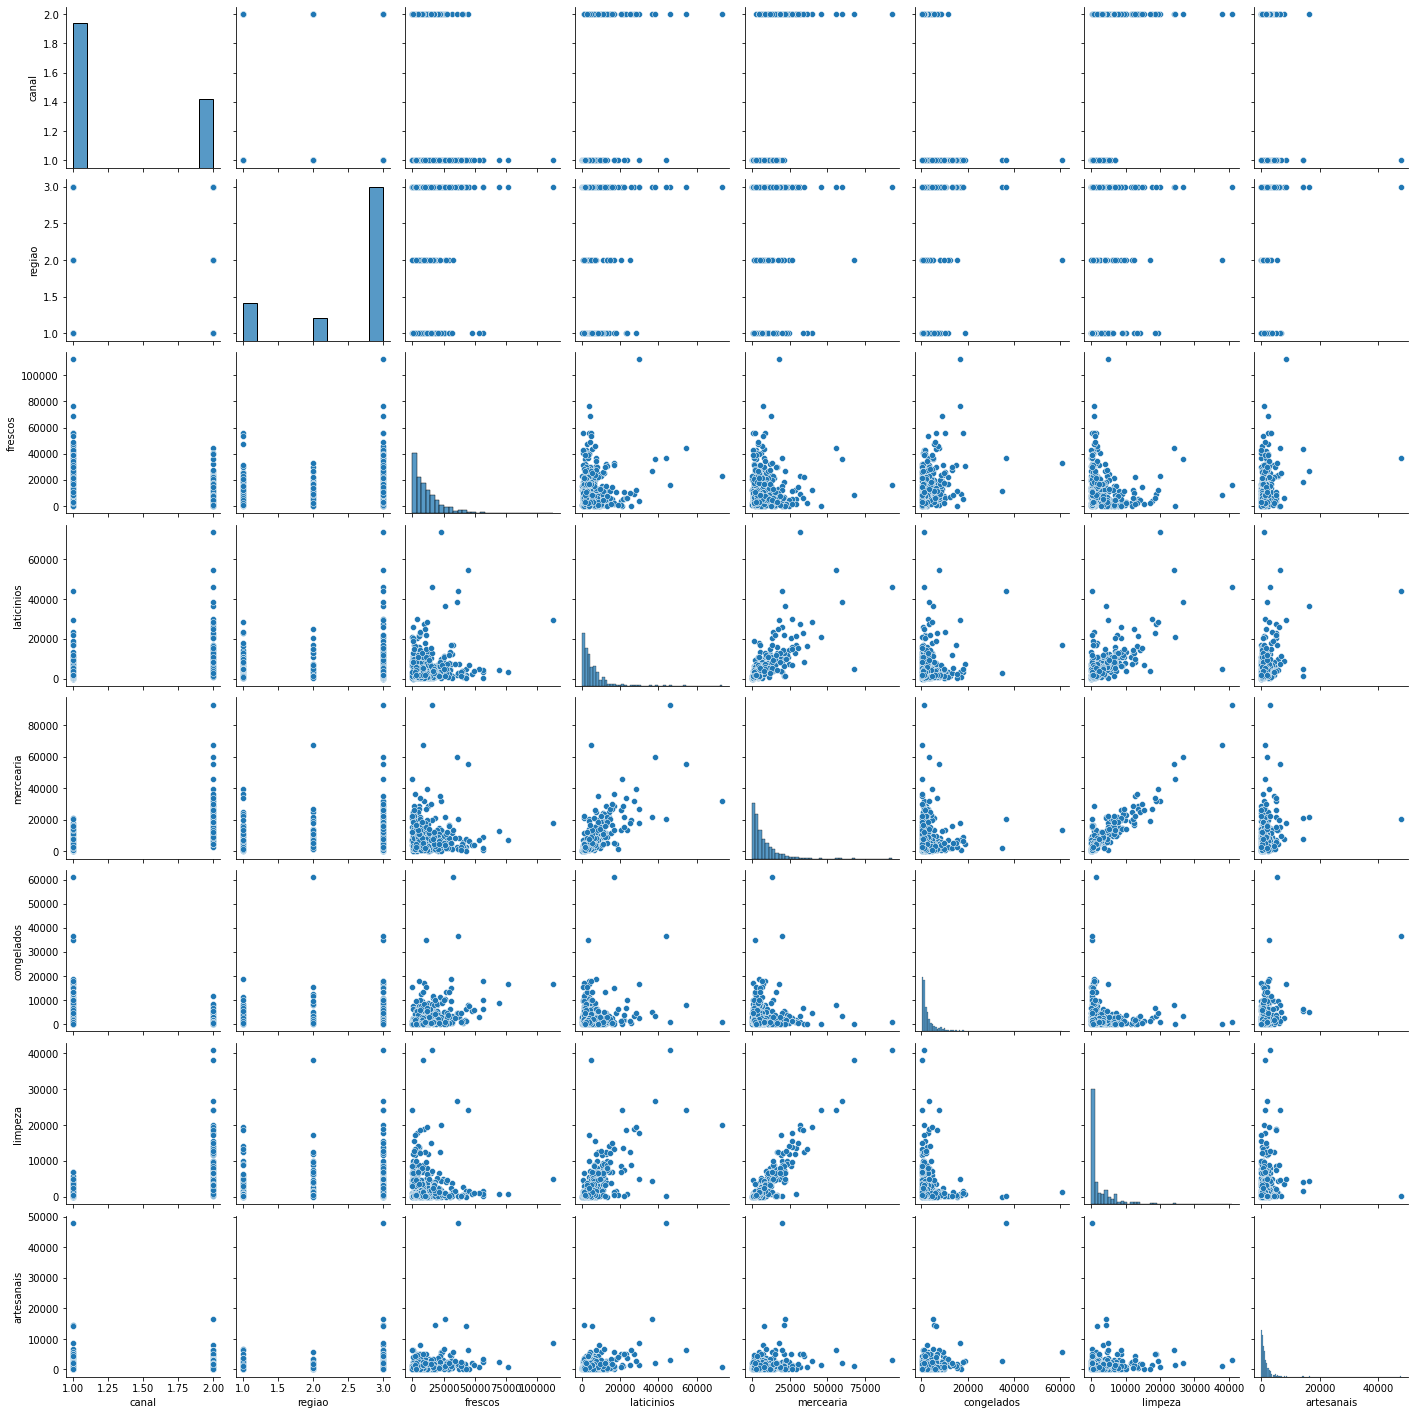

In [197]:
#### VALE 0.5 pontos
#### CONSTRUA OS SEUS GRAFICOS ABAIXO, USE MAIS CELULAS SE NECESSARIO
# sns.pairplot(data=data.drop(['canal', 'regiao'], axis=1))
sns.pairplot(data=data)

**Separando as variáveis categóricas das contínuas**

In [198]:
categorical_features = data.loc[:,['canal', 'regiao']]
continuous_features = data.drop(['canal', 'regiao'], axis=1)

**Gerando vaiáveis dummies**

In [199]:
for col in categorical_features:
    dummies = pd.get_dummies(data[col], prefix=col)
    data = pd.concat([data, dummies], axis=1)
    data.drop(col, axis=1, inplace=True)
data.head()

,frescos,laticinios,mercearia,congelados,limpeza,artesanais,canal_1,canal_2,regiao_1,regiao_2,regiao_3
0,12669,9656,7561,214,2674,1338,0,1,0,0,1
1,7057,9810,9568,1762,3293,1776,0,1,0,0,1
2,6353,8808,7684,2405,3516,7844,0,1,0,0,1
3,13265,1196,4221,6404,507,1788,1,0,0,0,1
4,22615,5410,7198,3915,1777,5185,0,1,0,0,1


In [200]:
mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)

In [201]:
def calculate_wcss(data_frame):
    wcss = []
    for n in range(2, 16):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data_frame)
        wcss.append(kmeans.inertia_)

    return wcss

In [202]:
elbow = calculate_wcss(data_transformed)

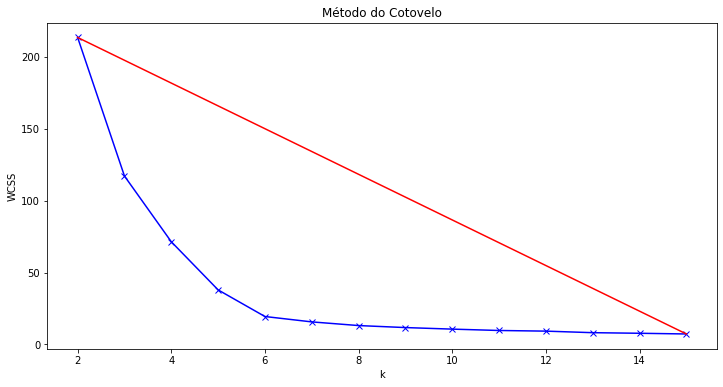

In [203]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(1, len(elbow)+1)+1, elbow, '-bx')
plt.plot([2, 15], [elbow[0], elbow[-1]], color='r')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title("Método do Cotovelo")
plt.show()

**Calculando o número ótimo de clusters:**

O melhor número de clusteres é o ponto K que é onde a curva se suaviza. Matematicamente, seria o a maior distância do ponto da curva "elbow" até a reta em vermelho no gráfico acima, calculada pela fómula de menor distância de um ponto à uma reta.

Fómula para cálculo de distância de um ponto a uma reta:
![fórmula distância ponto a reta](https://miro.medium.com/max/1400/1*9J7Wnh5L0eIcHXBeWlzvNA.png)

[fonte](https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/#h2_13)

**Função de k ótimo**

In [204]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = ((y2 - y1)**2 + (x2 - x1)**2)**.5
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

**Resultado para o melhor número de K**

In [205]:
k = optimal_number_of_clusters(elbow)
print('Melhor número de clusteres: ', k)

Melhor número de clusteres:  6


Construa um modelo de **clusterização K-Médias** usando o melhor numero de clusters informado pelo gráfico de cotovelo e usem o parametro **random_state** com valor 10.

In [206]:
#### VALE 0.5 pontos
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO

kmeans = KMeans(n_clusters=k)
kmeans.fit(data_transformed)
pred = kmeans.predict(data_transformed)
pred

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 2, 5,
       2, 2, 5, 5, 2, 2, 2, 5, 2, 5, 2, 5, 2, 5, 2, 2, 5, 2, 5, 2, 5, 2,
       2, 2, 2, 5, 2, 2, 5, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 5, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       5, 2, 5, 2, 5, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 4, 3, 4, 3, 3, 4, 3,

Adicione o resultado da clusterização no conjunto de dados original, chame essa nova variavel de **cluster** e conte quantas observações há em cada cluster e preencha:

In [207]:
#### VALE 0.5 pontos
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO
klustered_data = data
klustered_data['cluster'] = pred

In [208]:
klustered_data.head()

,frescos,laticinios,mercearia,congelados,limpeza,artesanais,canal_1,canal_2,regiao_1,regiao_2,regiao_3,cluster
0,12669,9656,7561,214,2674,1338,0,1,0,0,1,1
1,7057,9810,9568,1762,3293,1776,0,1,0,0,1,1
2,6353,8808,7684,2405,3516,7844,0,1,0,0,1,1
3,13265,1196,4221,6404,507,1788,1,0,0,0,1,0
4,22615,5410,7198,3915,1777,5185,0,1,0,0,1,1


In [209]:
kd = klustered_data['cluster'].value_counts()
kd

0    211
1    105
2     59
4     28
3     19
5     18
Name: cluster, dtype: int64

In [210]:
#### VALE 0.5 pontos
# Substitua __ pelos valores solicitados
for r in range(len(kd)):
    print('Total de observações do cluster {}: {}'.format(r+1, kd.loc[r]))

# print('Total de observações do cluster 1: {}'.format(kd.loc[0]))
# print('Total de observações do cluster 2: {}'.format(kd.loc[1]))
# print('Total de observações do cluster 3: {}'.format(kd.loc[2]))
# print('Total de observações do cluster 4: {}'.format(kd.loc[3]))
# print('Total de observações do cluster 5: {}'.format(kd.loc[4]))
# print('Total de observações do cluster 6: {}'.format(kd.loc[5]))
# copie a linha de cima, alterando o cluster e preenchendo o total

Total de observações do cluster 1: 211
Total de observações do cluster 2: 105
Total de observações do cluster 3: 59
Total de observações do cluster 4: 19
Total de observações do cluster 5: 28
Total de observações do cluster 6: 18


# Exercicio 2. (4.0 pontos)

Escolha dois clusters e separe os dados em dois subconjuntos, chamando-os de clusterA e clusterB.

In [211]:
#### VALE 1.0 ponto
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO

data_k = _data
data_k['cluster'] = pred

In [212]:
clusterA = data_k[data_k['cluster'] == 0]
clusterB = data_k[data_k['cluster'] == 1]

In [213]:
clusterA.head()

,canal,regiao,frescos,laticinios,mercearia,congelados,limpeza,artesanais,cluster
3,1,3,13265,1196,4221,6404,507,1788,0
8,1,3,5963,3648,6192,425,1716,750,0
15,1,3,10253,1114,3821,397,964,412,0
17,1,3,5876,6157,2933,839,370,4478,0
19,1,3,7780,2495,9464,669,2518,501,0


In [214]:
clusterA.tail()

,canal,regiao,frescos,laticinios,mercearia,congelados,limpeza,artesanais,cluster
434,1,3,16731,3922,7994,688,2371,838,0
435,1,3,29703,12051,16027,13135,182,2204,0
436,1,3,39228,1431,764,4510,93,2346,0
438,1,3,10290,1981,2232,1038,168,2125,0
439,1,3,2787,1698,2510,65,477,52,0


In [229]:
clusterA.loc[(clusterA['canal']==1) & (clusterA['regiao']==3)].count()

canal         211
regiao        211
frescos       211
laticinios    211
mercearia     211
congelados    211
limpeza       211
artesanais    211
cluster       211
dtype: int64

In [215]:
clusterB.head()

,canal,regiao,frescos,laticinios,mercearia,congelados,limpeza,artesanais,cluster
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
4,2,3,22615,5410,7198,3915,1777,5185,1
5,2,3,9413,8259,5126,666,1795,1451,1


In [216]:
clusterB.tail()

,canal,regiao,frescos,laticinios,mercearia,congelados,limpeza,artesanais,cluster
418,2,3,660,8494,18622,133,6740,776,1
421,2,3,17063,4847,9053,1031,3415,1784,1
423,2,3,17565,3686,4657,1059,1803,668,1
424,2,3,16980,2884,12232,874,3213,249,1
437,2,3,14531,15488,30243,437,14841,1867,1


In [231]:
clusterB.loc[(clusterB['canal']==2) & (clusterB['regiao']==3)].count()

canal         105
regiao        105
frescos       105
laticinios    105
mercearia     105
congelados    105
limpeza       105
artesanais    105
cluster       105
dtype: int64

Utilizaremos a função **.describe()** para obtermos as medidas de média, desvio padrão, valor minimo e valor máximo dos subconjuntos clusterA e clusterB

In [217]:
#### VALE 1.0 ponto
#### EXECUTE O COMANDO ABAIXO PARA clusterA

clusterA.describe()

,canal,regiao,frescos,laticinios,mercearia,congelados,limpeza,artesanais,cluster
count,211.0,211.0,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.0
mean,1.0,3.0,13878.052133,3486.981043,3886.734597,3656.900474,786.682464,1518.284360,0.0
std,0.0,0.0,14746.572913,4508.505269,3593.506056,4956.590848,1099.970640,3663.183304,0.0
min,1.0,3.0,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,0.0
25%,1.0,3.0,3702.500000,1188.500000,1666.000000,779.000000,176.500000,378.500000,0.0
50%,1.0,3.0,9612.000000,2247.000000,2642.000000,1960.000000,375.000000,823.000000,0.0
75%,1.0,3.0,18821.000000,4205.000000,4927.500000,4542.500000,948.500000,1582.000000,0.0
max,1.0,3.0,112151.000000,43950.000000,21042.000000,36534.000000,6907.000000,47943.000000,0.0


In [218]:
clusterA.value_counts()

canal  regiao  frescos  laticinios  mercearia  congelados  limpeza  artesanais  cluster
1      3       3        2920        6252       440         223      709         0          1
               18827    3677        1988       118         516      201         0          1
               13624    295         1381       890         43       84          0          1
               13779    1970        1648       596         227      436         0          1
               14039    7393        2548       6386        1333     2341        0          1
                                                                                          ..
               5963     3648        6192       425         1716     750         0          1
               5969     1990        3417       5679        1135     290         0          1
               6022     3354        3261       2507        212      686         0          1
               6137     5360        8040       129         3084     1603   

In [219]:
#### VALE 1.0 ponto
#### EXECUTE O COMANDO ABAIXO PARA clusterB

clusterB.describe()

,canal,regiao,frescos,laticinios,mercearia,congelados,limpeza,artesanais,cluster
count,105.0,105.0,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.0
mean,2.0,3.0,9831.504762,10981.009524,15953.809524,1513.200000,6899.238095,1826.209524,1.0
std,0.0,0.0,9635.394129,10574.827178,12298.935356,1504.498737,6022.091110,2119.052222,0.0
min,2.0,3.0,23.000000,1124.000000,4523.000000,33.000000,523.000000,3.000000,1.0
25%,2.0,3.0,2343.000000,6128.000000,9170.000000,437.000000,3537.000000,545.000000,1.0
50%,2.0,3.0,7362.000000,7845.000000,12121.000000,1059.000000,5121.000000,1386.000000,1.0
75%,2.0,3.0,15076.000000,11114.000000,19805.000000,2194.000000,7677.000000,2158.000000,1.0
max,2.0,3.0,44466.000000,73498.000000,92780.000000,8132.000000,40827.000000,16523.000000,1.0


In [220]:
clusterB.value_counts()

canal  regiao  frescos  laticinios  mercearia  congelados  limpeza  artesanais  cluster
2      3       23       2616        8118       145         3874     217         1          1
               7579     4956        9426       1669        3321     2566        1          1
               14531    15488       30243      437         14841    1867        1          1
               13146    1124        4523       1420        549      497         1          1
               12669    9656        7561       214         2674     1338        1          1
                                                                                          ..
               3366     5403        12974      4400        5977     1744        1          1
               3136     8630        13586      5641        4666     1426        1          1
               3103     14069       21955      1668        6792     1452        1          1
               2932     6459        7677       2561        4573     1386   

In [221]:
maximos = pd.DataFrame([clusterA.max(), clusterB.max()], index=['A','B']).drop(['canal', 'regiao', 'cluster'], axis=1).T
minimos = pd.DataFrame([clusterA.min(), clusterB.min()], index=['A','B']).drop(['canal', 'regiao', 'cluster'], axis=1).T
desvio_padrao = pd.DataFrame([clusterA.std(), clusterB.std()], index=['A','B']).drop(['canal', 'regiao', 'cluster'], axis=1).T
medias = pd.DataFrame([clusterA.mean(), clusterB.mean()], index=['A','B']).drop(['canal', 'regiao', 'cluster'], axis=1).T

In [222]:
maximos

,A,B
frescos,112151,44466
laticinios,43950,73498
mercearia,21042,92780
congelados,36534,8132
limpeza,6907,40827
artesanais,47943,16523


In [223]:
minimos

,A,B
frescos,3,23
laticinios,55,1124
mercearia,3,4523
congelados,25,33
limpeza,3,523
artesanais,3,3


In [224]:
desvio_padrao

,A,B
frescos,14746.572913,9635.394129
laticinios,4508.505269,10574.827178
mercearia,3593.506056,12298.935356
congelados,4956.590848,1504.498737
limpeza,1099.970640,6022.091110
artesanais,3663.183304,2119.052222


In [225]:
medias

,A,B
frescos,13878.052133,9831.504762
laticinios,3486.981043,10981.009524
mercearia,3886.734597,15953.809524
congelados,3656.900474,1513.200000
limpeza,786.682464,6899.238095
artesanais,1518.284360,1826.209524


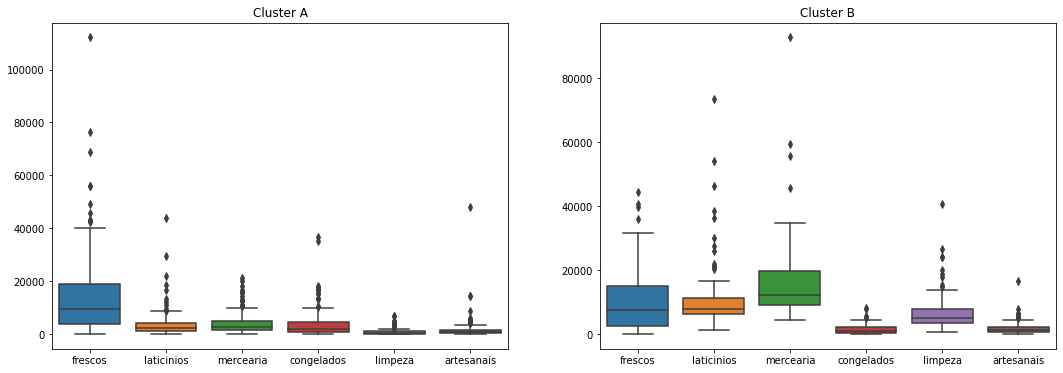

In [226]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
sns.boxplot(data=clusterA.drop(['canal', 'regiao', 'cluster'], axis=1))
plt.title('Cluster A')

plt.subplot(1,2,2)
sns.boxplot(data=clusterB.drop(['canal', 'regiao', 'cluster'], axis=1))
plt.title('Cluster B')

plt.show()

Comparando as médias, valores minimos e máximos obtidos, há diferença entre o subconjunto clusterA e clusterB?

**RESPOSTA** (VALE 0.5 pontos): (responda aqui, dê dois cliques para editar)

Sim, os clusteres A e B são os mais representativos do dataset, com 211 e 105 obeservações respectivamente.
Há muitas diferenças entre os perfis A e B, como por exemplo, o consumo de laticínios, mercearia e produtos de limpeza do **cluster B** é signitivamente maior do que do **cluster A**.

Ao mesmo tempo, o **cluster A** consome mais congelados.

Vale mencionar no entanto que há muito outliers, conforme o boxplot anterior, o que prejudica o modelo KMeans. Entretanto, o mais interessante é que todos os consumidores do **cluster A**, tem canal de compras 1 e região 3, ou seja, "HORECA" e "Outras Regiões", enquanto que o **cluster B**, tem canal de compras 2 e região 3, ou seja "Varejo" e outras regiões. 

Sendo dois agrupamentos distintos, qual rotulo poderiamos utilizar para identifica-los? Justifique a sua resposta

**RESPOSTA** (VALE 0.5 pontos): (responda aqui, dê dois cliques para editar)

Seria necessário uma análise dos outros clusteres. Mas poderíamos identifica-los a priori pela região e canal de venda, como por exemplo **cluster A** em "Outras Regiões - HORECA" e o **cluster B** em "Outras Regiões - Varejo"

# Exercicio 3. (3 pontos)

Responda, quais são as vantagens e desvantagens do algoritmo K-Médias?

**RESPOSTA** (VALE 1.0 ponto): (responda aqui, dê dois cliques para editar)

**Vantagens:**
- fácil implementação
- escalonável para grande conjunto de dados
- mais rápido quanto maior for o conjunto de dados
- possibilidade de determinar o custo computacional (na escolha do númer de clusteres)
- adaptar novos exemplos com muita frequencia
- generalização dos clusteres para diferentes formas e tamanhos

**Desvantagens:**
- Sensível a outliers
- precisa de um número prévio (escolha de número de clusteres)
- escolha do número de clusteres é um tanto quanto complexo.
- conforme o número de dimensões aumenta, sua escalabilidade diminui

Quantos elementos há em cada clusters se o numero de clusters for igual ao total de observações?

**RESPOSTA** (VALE 1.0 ponto): (responda aqui, dê dois cliques para editar)

Com n centroides em um dataset com n observações haverá apenas 1 elemento em cada cluster, sendo cada elemento, seu próprio centróide.

Se o parametro **k** for igual a 1, quantos clusters teremos e quantos elementos há em cada cluster?

**RESPOSTA** (VALE 1.0 ponto): (responda aqui, dê dois cliques para editar)

Teremos todos os elementos em apenas 1 cluster pois haverá apenas 1 centróide e consequentemente, apenas 1 cluster.